# Fashion Deep Learning Recommendation Systems

In [ ]:
import numpy as np

import pickle as pkl

import tensorflow as tf

from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers import GlobalMaxPool2D



from sklearn.neighbors import NearestNeighbors

import os

from numpy.linalg import norm

In [ ]:
#Extract Filenames from Folder

In [ ]:
filenames = []

for file in os.listdir('/kaggle/input/fashion-product-images-small/images'):
    filenames.append(os.path.join('/kaggle/input/fashion-product-images-small/images',file))



In [ ]:
len(filenames)

44441

In [ ]:
#Importing ResNet50 Model and Cofiguration

In [ ]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False
model = tf.keras.models.Sequential([model,GlobalMaxPool2D()])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
#Extracting Fetaures from Image

In [ ]:
def extract_features_from_images(image_path, model):

    img = image.load_img(image_path, target_size=(224,224))

    img_array = image.img_to_array(img)

    img_expand_dim = np.expand_dims(img_array, axis=0)

    img_preprocess = preprocess_input(img_expand_dim)

    result = model.predict(img_preprocess).flatten()

    norm_result = result/norm(result)

    return norm_result

In [ ]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.00043661, 0.        , 0.02227335, ..., 0.00194948, 0.01470532,
       0.01042836], dtype=float32)

In [ ]:
image_features = []

for file in filenames[0:10000]:

    image_features.append(extract_features_from_images(file, model))

image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.00043661, 0.        , 0.02227335, ..., 0.00194948, 0.01470532,
        0.01042836], dtype=float32),
 array([0.        , 0.05156705, 0.00386303, ..., 0.03591822, 0.02286726,
        0.06476431], dtype=float32),
 array([0.00700927, 0.05616754, 0.01070841, ..., 0.00207852, 0.03612409,
        0.00679433], dtype=float32),
 array([0.00359723, 0.00645735, 0.02641729, ..., 0.01571777, 0.03221679,
        0.01262881], dtype=float32),
 array([0.        , 0.01346459, 0.01379768, ..., 0.01387399, 0.02089634,
        0.02879267], dtype=float32),
 array([0.00984494, 0.04401161, 0.00330518, ..., 0.00213698, 0.00055642,
        0.07498055], dtype=float32),
 array([0.00144477, 0.01153558, 0.00599711, ..., 0.        , 0.04930685,
        0.01614776], dtype=float32),
 array([0.        , 0.00767274, 0.04320749, ..., 0.        , 0.01116149,
        0.        ], dtype=float32),
 array([0.        , 0.01343257, 0.00644786, ..., 0.00438619, 0.03491246,
        0.02748539], dtype=float32),
 array([0.

In [ ]:
Image_features = pkl.dump(image_features, open('/kaggle/working/Images_features.pkl','wb'))

In [ ]:
filenames = pkl.dump(filenames, open('/kaggle/working/filenames.pkl','wb'))

In [ ]:
#Loading Pickle Files

In [ ]:
Image_features = pkl.load(open('/kaggle/working/Images_features.pkl','rb'))

In [ ]:
filenames = pkl.load(open('/kaggle/working/filenames.pkl','rb'))

In [ ]:
np.array(Image_features).shape

(10000, 2048)

In [ ]:
#Finidng Simialar Images

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [ ]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [ ]:
input_image = extract_features_from_images('/kaggle/input/fashion-product-images-small/images/14000.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [ ]:
distance,indices = neighbors.kneighbors([input_image])

In [ ]:
indices[0]

array([8739, 1745, 8438, 2907, 6482, 8958])

In [ ]:
from IPython.display import Image

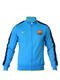

In [ ]:
Image('/kaggle/input/fashion-product-images-small/images/14000.jpg')

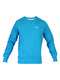

In [ ]:
Image(filenames[indices[0][1]])

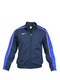

In [ ]:
Image(filenames[indices[0][2]])

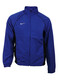

In [ ]:
Image(filenames[indices[0][3]])

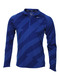

In [ ]:
Image(filenames[indices[0][4]])

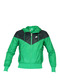

In [ ]:
Image(filenames[indices[0][5]])